## Introduction

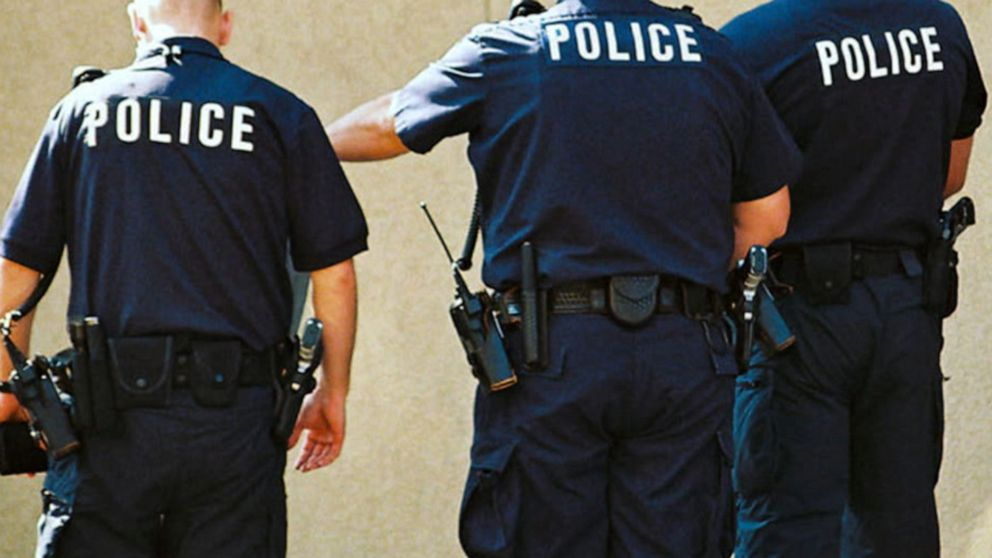

# Contents

- Information about Data
- Installation and Imports
- EDA Preparation
- Visualizations 

# Information about Data

- Dataset Name:US Police Shootings
- Dataset Columns:
- - id
- - name
- - date 
- - manner_of_death
- - armed
- - age
- - gender
- - race
- - city
- - state

# Installation and Imports

**EDA Libs**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
from collections import Counter

**Visualization Libs**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
import squarify

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/us-police-shootings/shootings.csv


In [4]:
data=pd.read_csv("../input/us-police-shootings/shootings.csv")
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


# EDA Preparation

In [5]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek

In [6]:
data.shape

(4895, 19)

In [7]:
data['above30'] = ['above30'if i >=30 else 'below30'for i in data.age]

data['generation']="-"
for i in data.age.index:
    if data['age'][i] >=0 and data['age'][i]<30:
        data['generation'][i]='20s'
    elif data['age'][i] >=30 and data['age'][i]<40:
        data['generation'][i]='30s'
    elif data['age'][i] >=40 and data['age'][i]<50:
        data['generation'][i]='40s'
    elif data['age'][i] >=50 and data['age'][i]<60:
        data['generation'][i]='50s'
    else:
        data['generation'][i]='60+'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-pa

In [8]:
state_names = dict(data['state'].value_counts()).keys()
state_cases = data['state'].value_counts().tolist()

state_df = pd.DataFrame()
state_df['state'] = state_names
state_df['incidents'] = state_cases
state_df.head()

,state,incidents
0,CA,701
1,TX,426
2,FL,324
3,AZ,222
4,CO,168


# Visualization

Text(0.5, 1.0, 'Most Common 15 States ')

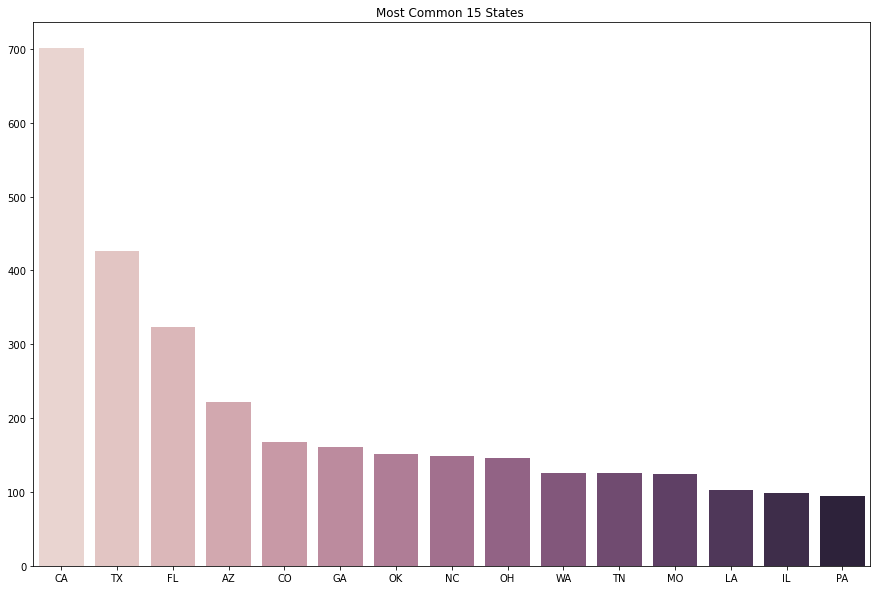

In [9]:
state_count = Counter(data.state)
most_common_states = state_count.most_common(15)
x,y = zip(*most_common_states)
x,y= list(x), list(y)

plt.figure(figsize=(15,10))
ax=sns.barplot(x=x,y=y, palette=sns.cubehelix_palette(len(x)))
plt.title('Most Common 15 States ')

Text(0.5, 1.0, 'Most Common 15 States ')

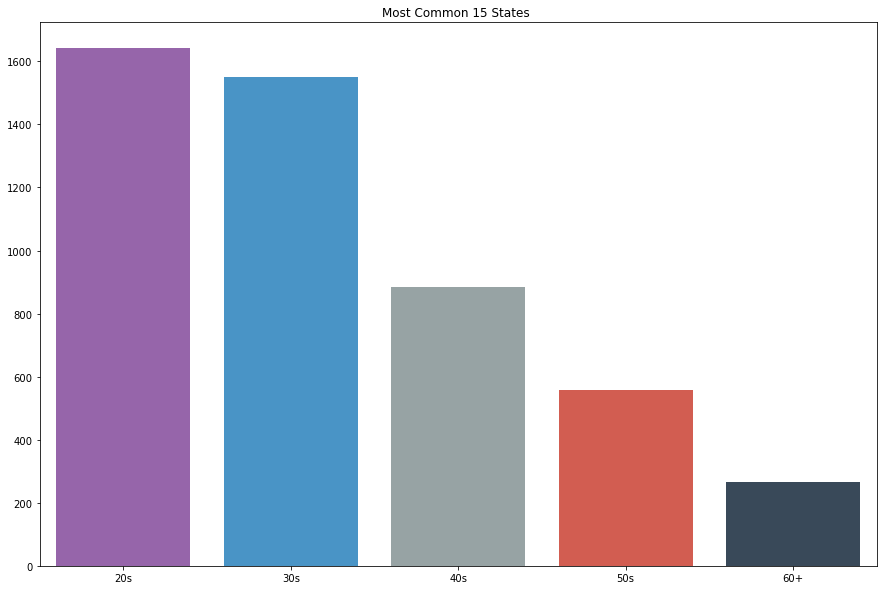

In [10]:
generation_count = Counter(data.generation)
generations = generation_count.most_common(5)
x,y = zip(*generations)
x,y= list(x), list(y)

plt.figure(figsize=(15,10))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]
ax=sns.barplot(x=x,y=y, palette=sns.color_palette(flatui))
plt.title('Most Common 15 States ')

In [11]:
df = px.data.tips()
fig = px.sunburst(data, path=['year', 'race', 'gender'], values='age',title="Dont Forget to Click Chart to Examine Deeply ")
fig.show()

In [12]:
targets = data['arms_category'].value_counts().tolist()
values = list(dict(data['arms_category'].value_counts()).keys())

fig = px.pie(
    values=targets, 
    names=values,
    title='Arms Categories',
    color_discrete_sequence=['darkcyan', 'lawngreen']
)
fig.show()

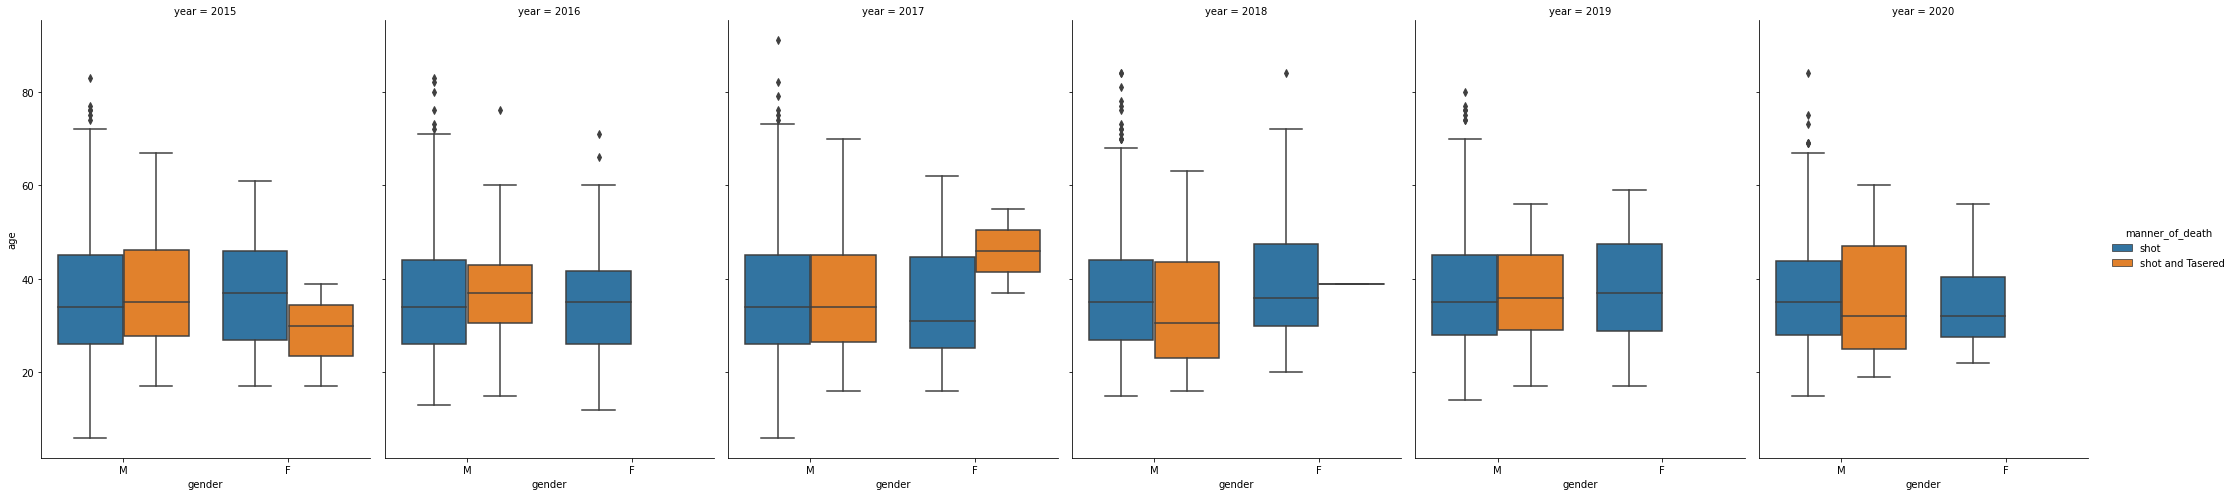

In [13]:
g = sns.catplot(x="gender", y="age",
                hue="manner_of_death", col="year",
                data=data, kind="box",
                height=7, aspect=.7);


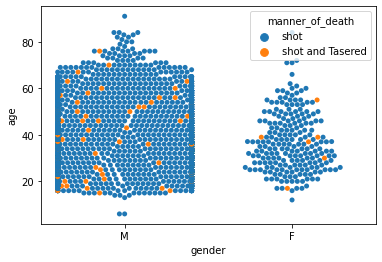

In [14]:
sns.swarmplot(x='gender',y='age',hue='manner_of_death',data=data)
plt.show()

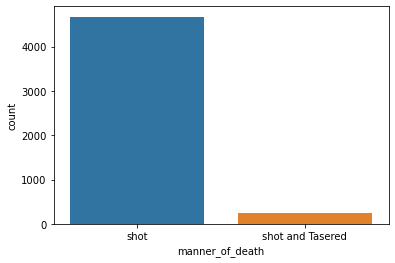

In [15]:
sns.countplot(data.gender)
sns.countplot(data.manner_of_death)
plt.show()

Text(0.5, 1.0, 'Age of People')

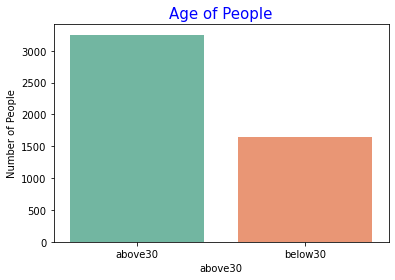

In [16]:
sns.countplot(x=data.above30,  palette="Set2")
plt.ylabel('Number of People')
plt.title('Age of People', color='blue', fontsize=15)

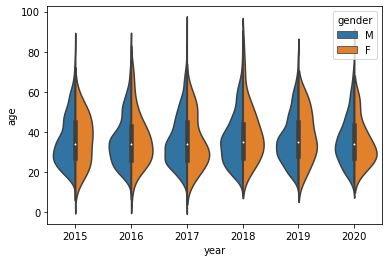

In [17]:
sns.violinplot(x ='year', y ='age', data = data, hue ='gender', split = True)

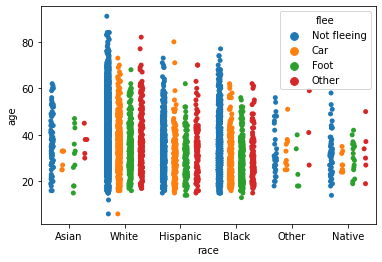

In [18]:
sns.stripplot(x ='race', y ='age', data = data,
              jitter = True, hue ='flee', dodge = True)

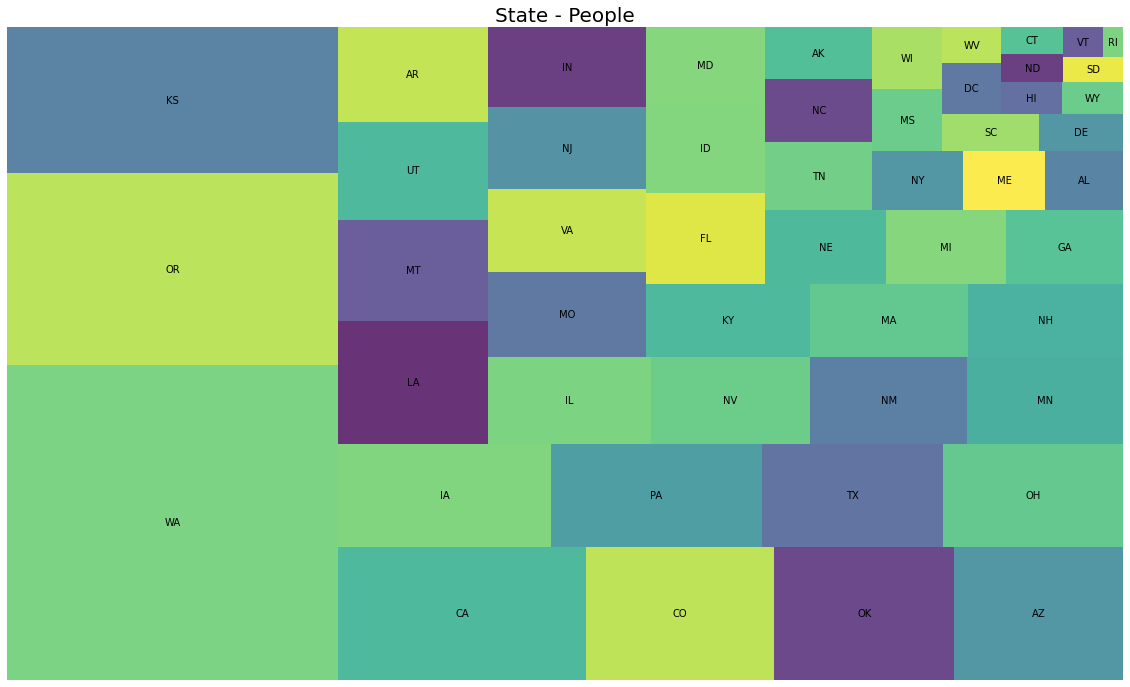

In [19]:
plt.figure(figsize = (20, 12))
squarify.plot(sizes = data.state.value_counts().values, alpha = 0.8,
              label = data.state.unique())
plt.title('State - People', fontsize = 20)
plt.axis('off')
plt.show()

In [20]:
fig = go.Figure(data=go.Choropleth(
    locations=state_df['state'], 
    z = state_df['incidents'].astype(int), 
    locationmode = 'USA-states',
    colorscale = 'Viridis', 
    colorbar_title = "Incidents Density", 
))

fig.update_layout(
    title_text = 'Police Shooting Cases Across US States', 
    geo_scope='usa', 
)

fig.show()

(-0.5, 511.5, 383.5, -0.5)

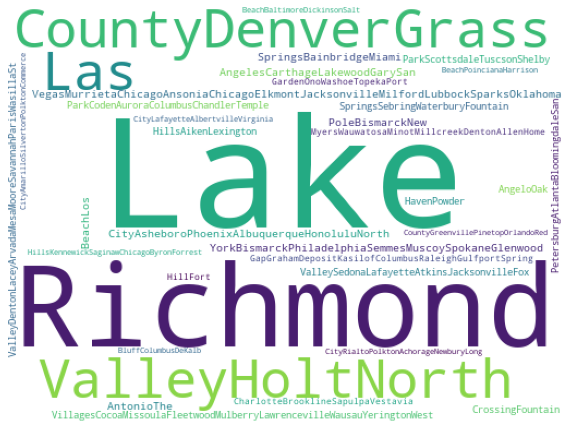

In [21]:
x2020=data.city[data.year==2020]
plt.subplots(figsize=(10,19))
wordcloud = WordCloud(background_color = 'white',
                     width=512,
                     height=384).generate("".join(x2020))

plt.imshow(wordcloud)
plt.axis('off')